# Deep Learning Intro

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Shallow and Deep Networks

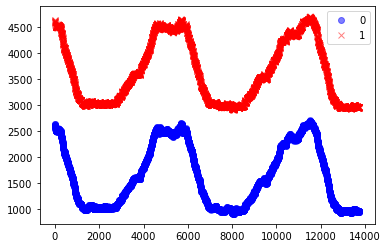

In [2]:
import pandas as pd

data = pd.read_csv("../../data/tmp.csv")
datacorrect = np.array(pd.read_csv("../../data/tmp2.csv")).flatten()

dataarray = np.array(data)
dataiscorrect = data[datacorrect==0]
dataisincorrect = data[datacorrect==1]

plt.plot(dataiscorrect["onlineplayers"], 'ob', alpha=0.5)
plt.plot(dataisincorrect["onlineplayers"], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, datacorrect,
                                                    test_size=0.3,
                                                    random_state=42)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

### Shallow Model

In [6]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
301/301 [==============================] - 1s 754us/step - loss: 89.4980 - accuracy: 0.6206
Epoch 2/100
301/301 [==============================] - 0s 830us/step - loss: 14.4013 - accuracy: 0.6415
Epoch 3/100
301/301 [==============================] - 0s 822us/step - loss: 14.7334 - accuracy: 0.6626
Epoch 4/100
301/301 [==============================] - 0s 887us/step - loss: 12.2505 - accuracy: 0.6781 0s - loss: 12.4168 - accuracy: 0.6
Epoch 5/100
301/301 [==============================] - 0s 754us/step - loss: 10.9713 - accuracy: 0.6924
Epoch 6/100
301/301 [==============================] - 0s 774us/step - loss: 12.9795 - accuracy: 0.6879
Epoch 7/100
301/301 [==============================] - 0s 865us/step - loss: 15.9864 - accuracy: 0.6844
Epoch 8/100
301/301 [==============================] - 0s 726us/step - loss: 7.8566 - accuracy: 0.7384
Epoch 9/100
301/301 [==============================] - 0s 960us/step - loss: 9.9802 - accuracy: 0.7376
Epoch 10/100
301/301 [=========

In [8]:
results = model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 594us/step - loss: 2.7418e-06 - accuracy: 1.0000


In [9]:
results

[2.7417675028118538e-06, 1.0]

In [10]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	1.000


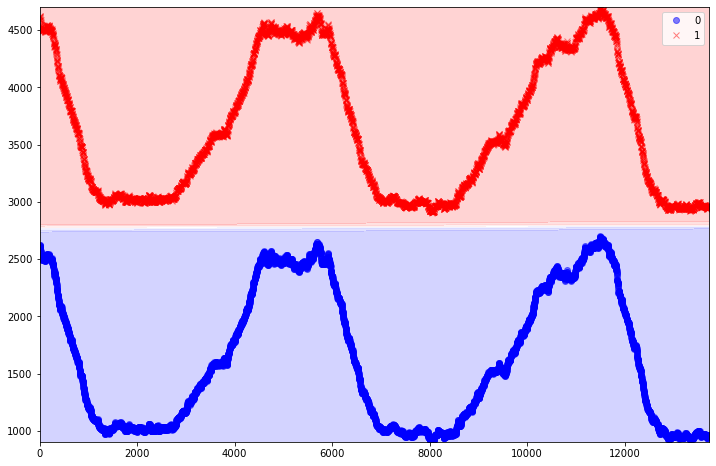

In [11]:
def plot_decision_boundary(model):
    amin, bmin = data.min(axis=0) - 0.1
    amax, bmax = data.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]

    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(dataiscorrect["onlineplayers"], 'ob', alpha=0.5)
    plt.plot(dataisincorrect["onlineplayers"], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model)

Het Classificatie vraagstuk is het identificeren van de surfer op het aantal spelers dat op dat moment online is. Het resultaat toont aan dat de rode server zwaarder wordt belast dan de blauwe server. Dit wordt goed herkendt door shallow model. 

### Reflectie
Het is niet heel makkelijk om een goede classificatie dataset te vinden. Ook was het lastig om de juiste instellingen te vinden voor het neural network. Maar uiteindelijk hebben we een resultaat dat een classificatie kan maken.